In [8]:
"Refaire avec le grand écran"
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones



from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential



from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model



import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

In [9]:
#Paramètres

#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1

In [9]:

horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.3
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1

In [71]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")


base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'

df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)

df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()


All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()


for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    
    
    
    


class: 13
img_paths: 6220


In [88]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation


In [57]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator()
        #preprocessing_function = preprocess_input,
        # data augmentation
        #rotation_range = 10,
        #zoom_ran 





test_data_generator = ImageDataGenerator(
    #preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_train) )


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_test))

gen=train_generator[0]

x_train=gen[0]
y_train=gen[1]



gen_test=test_generator[0]

x_test=gen_test[0]
y_test=gen_test[1]

SyntaxError: invalid syntax (<ipython-input-57-3f9ace4e38b0>, line 15)

In [5]:
(test_generator[0][1]).shape

(1194,)

In [ ]:
#Generateur fixe +Generateur change a chaque epochs sans augmentation d'images stagnation à 0.8 de précision au bout de 200 epochs

test_size 0.2
epochs 250
batch_size 600
zoom_range 1
horizontal_flip  False
dropout_rate 0.3


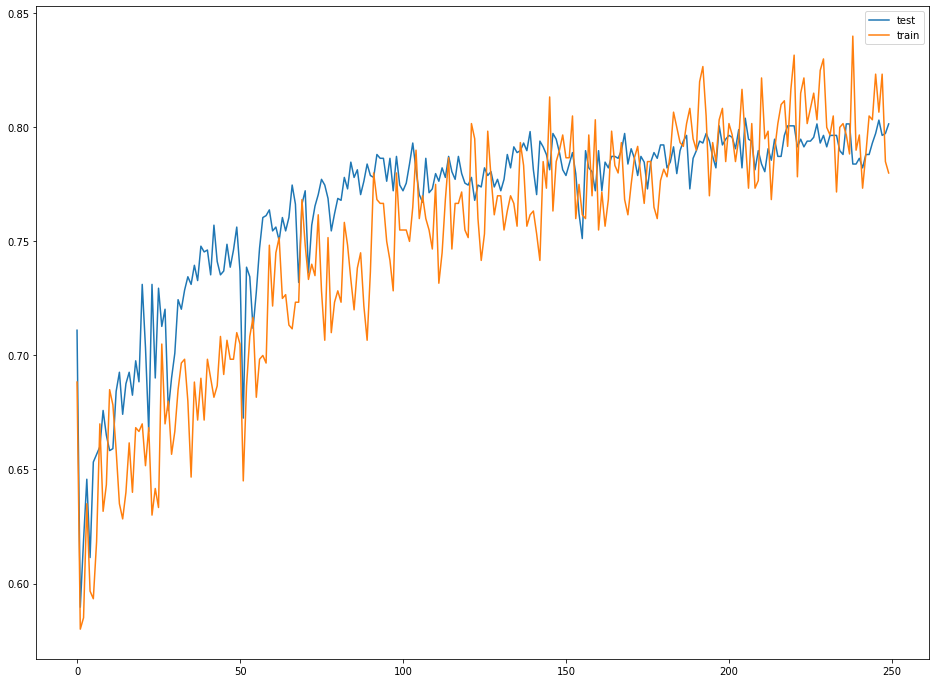

In [20]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=250
batch_size = 600
zoom_range = 1
horizontal_flip = False
dropout_rate=0.3



val_accuracy=[]
accuracy=[]




datagen = ImageDataGenerator(
   )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
#lenet.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)



history=lenet.fit(x_train, y_train,validation_data=(x_test,y_test),verbose=0,
                 steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_steps=len(data_test)//batch_size)



longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)




plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [ ]:
lenet.save("iteration_no_transformation")

In [ ]:
#Generateur change à chaque epochs mais sans augmentation

test_size 0.2
epochs 250
batch_size 600
zoom_range 1
horizontal_flip  False
dropout_rate 0.3


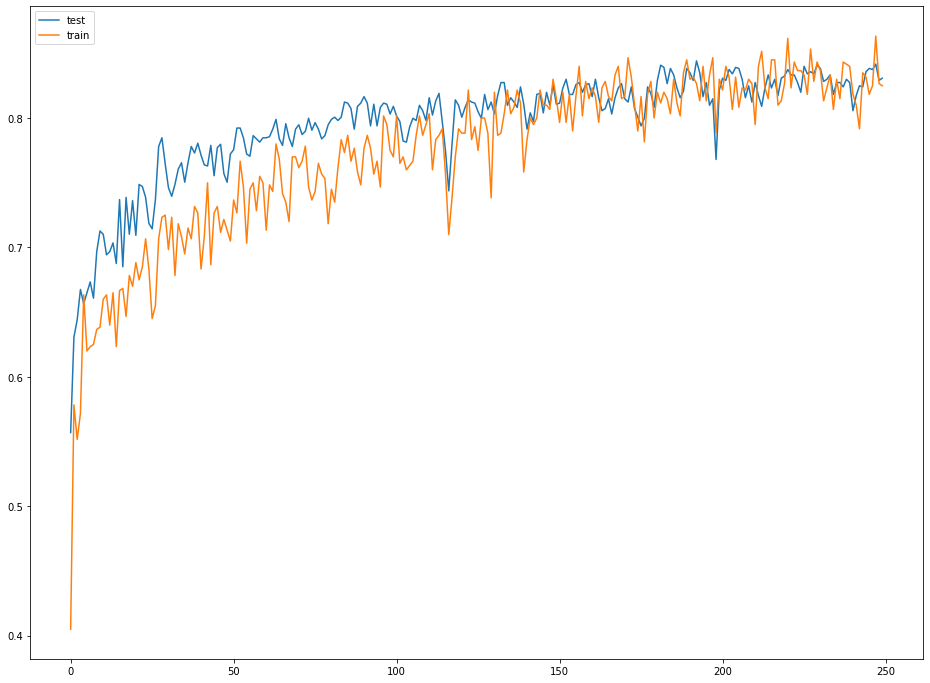

In [45]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=250
batch_size = 600
zoom_range = 1
horizontal_flip = False
dropout_rate=0.3





lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
                optimizer='adam',                 # algorithme de descente de gradient
                metrics=['accuracy'])             # métrique d'évaluation

val_accuracy=[]
accuracy=[]

"""datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)"""


datagen = ImageDataGenerator(
   )


longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)




plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [46]:
lenet.save("iteration")

In [66]:
#Generateur mobile avec zoom de 1.2 stagne vers 75 epochs

test_size 0.2
epochs 200
batch_size 600
zoom_range 1.2
horizontal_flip  True
dropout_rate 0


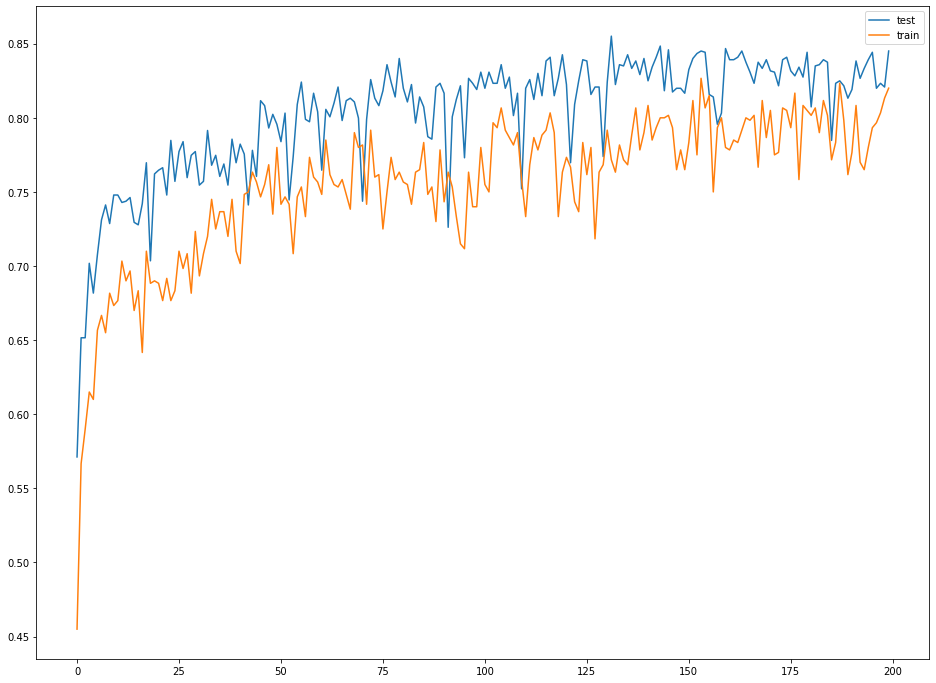

In [66]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.2
horizontal_flip = True
dropout_rate=0





val_accuracy=[]
accuracy=[]

datagen = ImageDataGenerator(zoom_range =zoom_range)
#featurewise_center=True,
#featurewise_std_normalization=True,
#rotation_range=20,
#width_shift_range=0.2,
#height_shift_range=0.2,
#horizontal_flip=True
    
    

datagen.fit(x_train)

longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)




plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [ ]:
#On rajoute la rotation de 10 degré en plus du zoom avec un dropout de 0.1

test_size 0.2
epochs 200
batch_size 600
zoom_range 1.2
horizontal_flip  True
dropout_rate 0.1


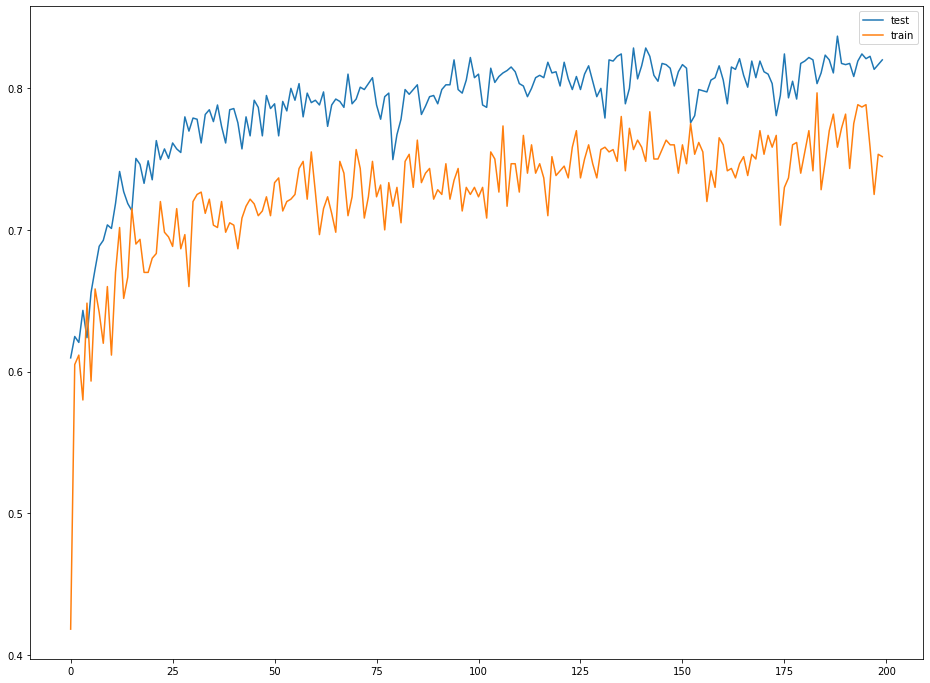

In [75]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.2
#horizontal_flip = True
dropout_rate=0.1





lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
                optimizer='adam',                 # algorithme de descente de gradient
                metrics=['accuracy'])             # métrique d'évaluation

val_accuracy=[]
accuracy=[]

datagen = ImageDataGenerator(
        #preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        #horizontal_flip = horizontal_flip
        )





longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)




plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [76]:
lenet.save("z1.2_r_20_drpt_0.1")

In [81]:
#On enlève le droout maintenant

test_size 0.2
epochs 200
batch_size 600
zoom_range 1.2
horizontal_flip  True
dropout_rate 0.1


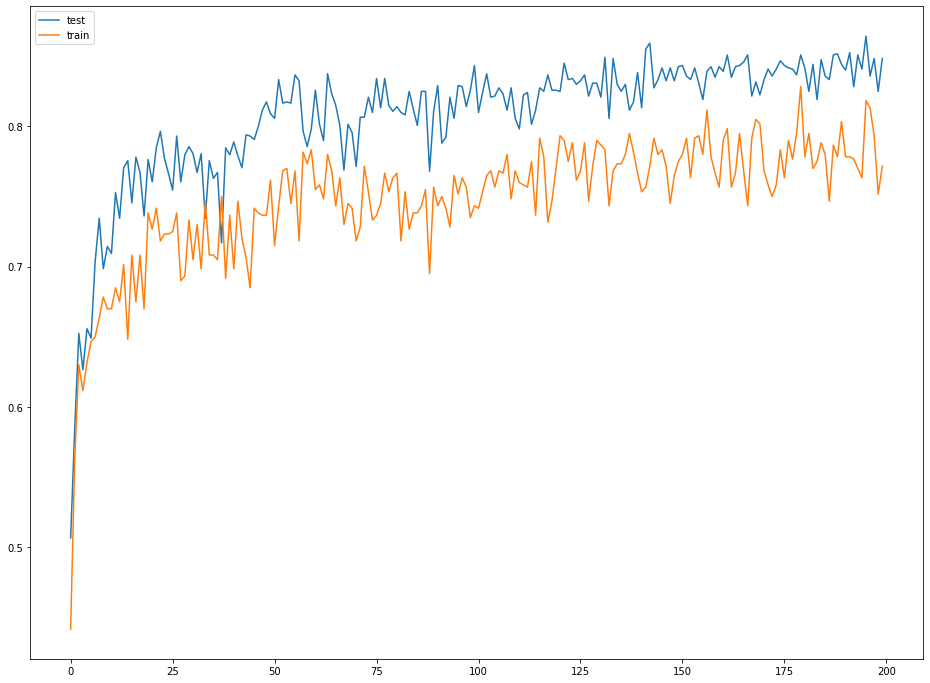

In [89]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.2
#horizontal_flip = True
dropout_rate=0.1





lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
                optimizer='adam',                 # algorithme de descente de gradient
                metrics=['accuracy'])             # métrique d'évaluation

val_accuracy=[]
accuracy=[]

datagen = ImageDataGenerator(
        #preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        #horizontal_flip = horizontal_flip
        )





longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)

lenet.save("z1.2_r_20")



plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [90]:
#filp en plus des autres transformations acc vers 0.8 au bout de 75 epochs

test_size 0.2
epochs 200
batch_size 600
zoom_range 1.2
horizontal_flip  True
dropout_rate 0


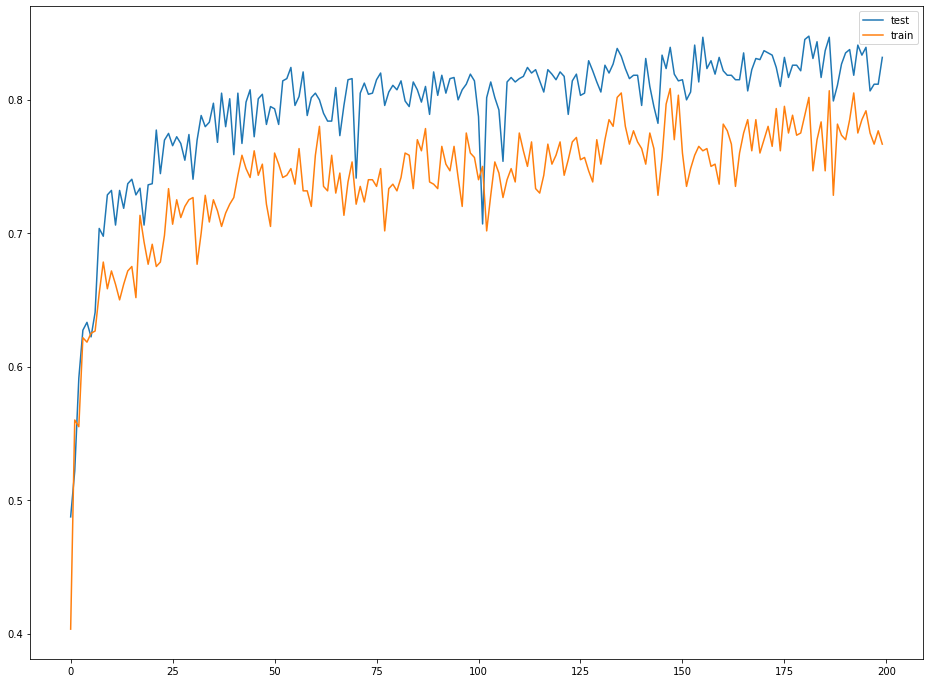

In [81]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.2
horizontal_flip = True
dropout_rate=0





lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
                optimizer='adam',                 # algorithme de descente de gradient
                metrics=['accuracy'])             # métrique d'évaluation

val_accuracy=[]
accuracy=[]














datagen = ImageDataGenerator(
        #preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_ran





longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)



lenet.save("z1.2_r_20_hflip_rotation_10")

plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()

In [86]:
#Avec preprocessing dans le générateur, l'echantillon de test stagne (peut être essayer avec le test en processing_input)

test_size 0.2
epochs 250
batch_size 600
zoom_range 1.2
horizontal_flip  True
dropout_rate 0


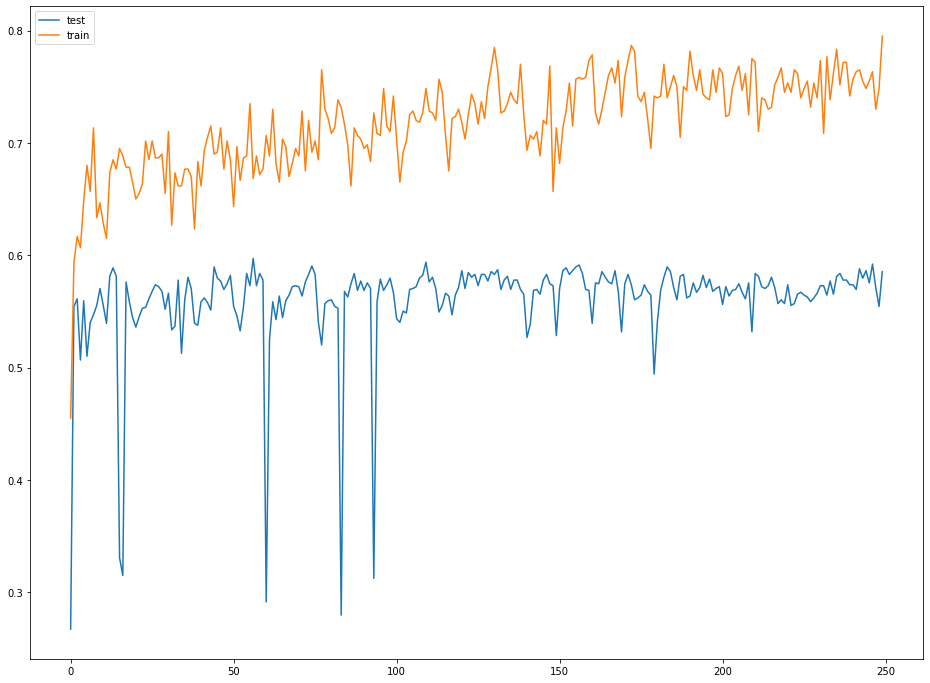

In [86]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=250
batch_size = 600
zoom_range = 1.2
horizontal_flip = True
dropout_rate=0





lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
                optimizer='adam',                 # algorithme de descente de gradient
                metrics=['accuracy'])             # métrique d'évaluation

val_accuracy=[]
accuracy=[]

datagen = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )





longueur=round(len(x_train)) 
for e in range(epochs):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break 
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)




plt.figure(figsize=(16,12))
plt.plot(val_accuracy,label="test")
plt.plot(accuracy,label="train")
plt.legend()